# This is the notebook for my Coursera IBM Datascience Capstone project

In [1]:
import pandas as pd
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


To fix: convert values in the selected features to be a float.

# Introduction/Business Problem

I am looking to determine the probability of a car accident occuring as well as the severity of the accident. I will be utilizing weather, traffic, and road contidion data in order to determine these two factors. My target audience will be car drivers who would like to know this information in order to be safer on the road.

# Data

I will be using the data from the csv provided for my predictions. I will definately be utilizing the road contidtions, weather, and severity. I will be utilizing AI trained on the sample data in order to predict the results. A simple at a glance example would be if it is dark outside, in weather that has bad visibility, at night (which also has bad visiblity), with wet/icy road contitions, then the results should show a high probability of an accident, with the severity being "Property damage only," "Injury Collision," "Sever Inury Collision," or "Fatal Collision."

I am choosing to focus on the light, road, and weather as those factors are the easiest to determine on a given day for someone trying to decide if it is safe to drive or not.

While factors such as the collision type no doubt would give potentially more information in regards to the severity of the collision, it is not something that someone could reliably plan for.

# Importing other needed tools

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
%matplotlib inline

print('Done!')

Done!


In [3]:
'''!conda install -c anaconda seaborn -y
import seaborn as sns
print('Seaborn imported!')'''

"!conda install -c anaconda seaborn -y\nimport seaborn as sns\nprint('Seaborn imported!')"

In [4]:
#sample csv
#!wget -O collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

#found csb
!wget -O collisions.csv https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

--2020-09-04 17:58:49--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 54.144.127.131, 3.222.165.155, 34.196.73.37
Connecting to opendata.arcgis.com (opendata.arcgis.com)|54.144.127.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘collisions.csv’

    [      <=>                              ] 84,814,898  78.3MB/s   in 1.0s   

2020-09-04 17:58:51 (78.3 MB/s) - ‘collisions.csv’ saved [84814898]



In [5]:
df = pd.read_csv('collisions.csv')
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.288688,47.532714,1,29800,29800,1177964,Unmatched,Block,NaN,BEACON ER AVE S BETWEEN S PORTLAND ST AND S CH...,...,NaN,NaN,NaN,4315006.0,NaN,NaN,NaN,0,0,N
1,NaN,NaN,2,115700,115700,10097005,Unmatched,NaN,NaN,NaN,...,NaN,NaN,NaN,10097005.0,NaN,NaN,NaN,0,0,N
2,-122.355556,47.727318,3,1358,1358,3568600,Matched,Block,NaN,GREENWOOD AVE N BETWEEN N 134TH ST AND N 136TH ST,...,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
3,-122.317563,47.618764,4,70700,70700,2806057,Matched,Block,NaN,E DENNY WAY BETWEEN 11TH AVE AND 12TH AVE,...,Dry,Other,NaN,7065007.0,NaN,32,One parked--one moving,0,0,N
4,-122.361015,47.538551,5,53600,53600,2127310,Matched,Block,NaN,DELRIDGE WAY SW BETWEEN SW MYRTLE ST AND SW OR...,...,Dry,Daylight,NaN,6137017.0,NaN,14,From same direction - both going straight - on...,0,0,N


In [6]:
df.shape

(221144, 40)

### Data Visualization and Preprocessing

In [7]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [8]:
df.shape

(221144, 40)

In [9]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137414
Injury Collision                   58665
Unknown                            21620
Serious Injury Collision            3096
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

In [10]:
df['SEVERITYCODE'].value_counts()

1     137414
2      58665
0      21619
2b      3096
3        349
Name: SEVERITYCODE, dtype: int64

In [11]:
df.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts()

SEVERITYCODE  SEVERITYDESC                  
0             Unknown                            21619
1             Property Damage Only Collision    137414
2             Injury Collision                   58665
2b            Serious Injury Collision            3096
3             Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

We can see that the severity codes directly line up with a specific description, but there are two issues with how it is orgainized. The first is that code 0 a.k.a. 'Unknown' tells us nothing about the severity so it should be dropped. The second issue is that 2b, 'Serious Injury Collision' is a string and not an integer which will make the machine learninging portion harder to deal with. I will fix this by setting the code for 'Fatality Collision' to 4 and the 'Serious Injury Collision' code to 3.

In [12]:
df['SEVERITYCODE'] = df['SEVERITYCODE'].replace(['3'],'4')
df['SEVERITYCODE'] = df['SEVERITYCODE'].replace(['2b'],'3')
df = df[~df['SEVERITYDESC'].isin(['Unknown'])]

In [13]:
df.groupby(['SEVERITYCODE'])['SEVERITYDESC'].value_counts()

SEVERITYCODE  SEVERITYDESC                  
1             Property Damage Only Collision    137414
2             Injury Collision                   58665
3             Serious Injury Collision            3096
4             Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

Dropping null values because they are null.

In [14]:
wcrash = df['WEATHER'].value_counts()
wcrash

Clear                       114342
Raining                      34018
Overcast                     28503
Unknown                      15131
Snowing                        919
Other                          851
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               56
Severe Crosswind                26
Partly Cloudy                    9
Blowing Snow                     1
Name: WEATHER, dtype: int64

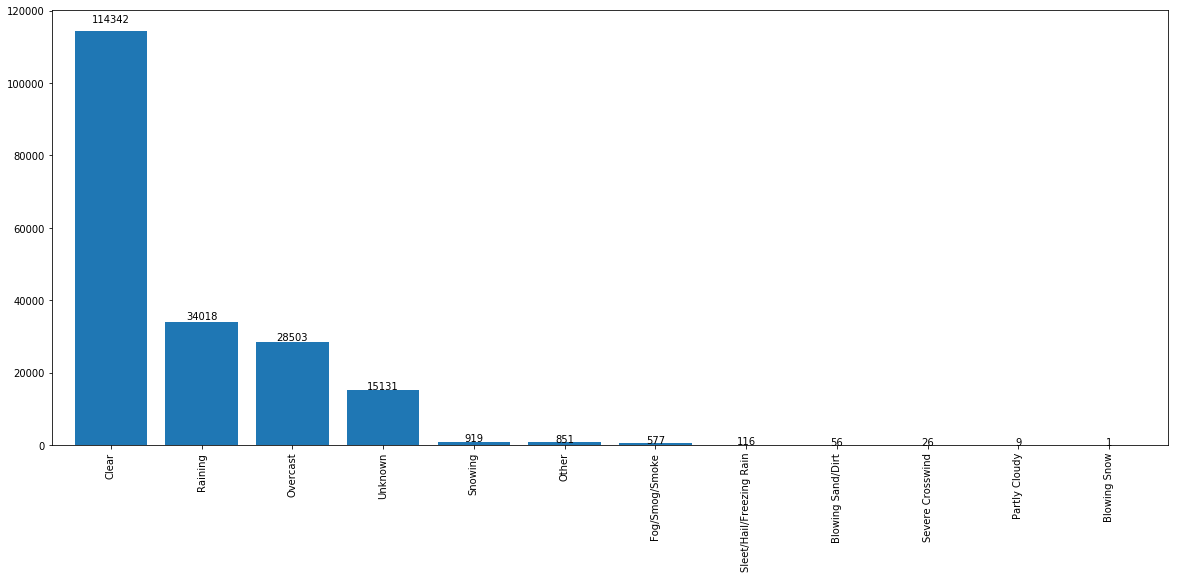

In [15]:
wcp = wcrash.plot(kind = 'bar', figsize = (20,8), width = 0.8)
plt.title = 'Number of collisions for Weather Condition'

for p2 in wcp.patches:
    width = p2.get_width()
    height = p2.get_height()
    x,y = p2.get_xy()
    val = height
    wcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

In [16]:
rccrash = df['ROADCOND'].value_counts()
rccrash

Dry               128150
Wet                48709
Unknown            15129
Ice                 1231
Snow/Slush          1014
Other                136
Standing Water       119
Sand/Mud/Dirt         77
Oil                   64
Name: ROADCOND, dtype: int64

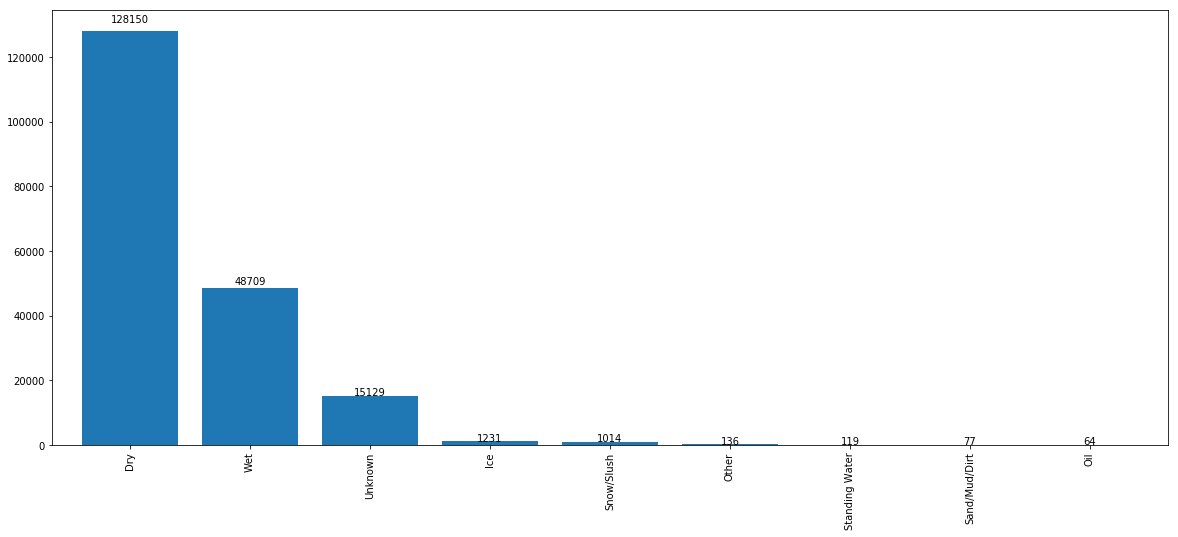

In [17]:
rcp = rccrash.plot(kind = 'bar', figsize = (20,8), width = 0.8)
plt.title = 'Number of collisions for Road Condition'

for p2 in rcp.patches:
    width = p2.get_width()
    height = p2.get_height()
    x,y = p2.get_xy()
    val = height
    rcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

In [18]:
lcrash  = df['LIGHTCOND'].value_counts()
lcrash

Daylight                    119147
Dark - Street Lights On      50048
Unknown                      13520
Dusk                          6074
Dawn                          2599
Dark - No Street Lights       1573
Dark - Street Lights Off      1236
Other                          244
Dark - Unknown Lighting         20
Name: LIGHTCOND, dtype: int64

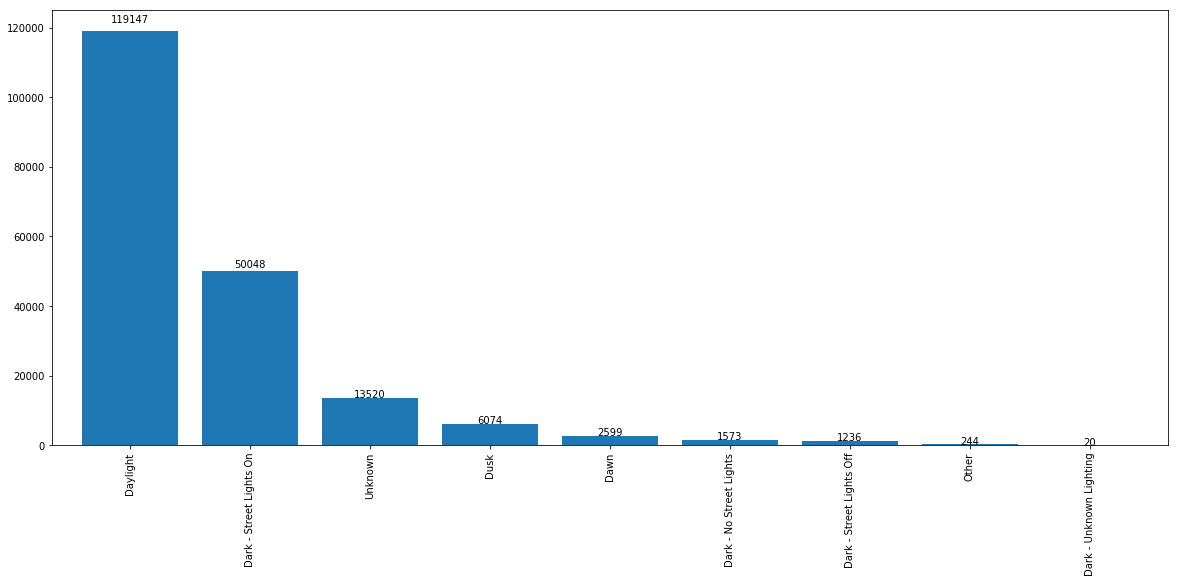

In [19]:
lcp = lcrash.plot(kind = 'bar', figsize = (20,8), width = 0.8)
plt.title = 'Number of collisions for Light Condition'

for p2 in lcp.patches:
    width = p2.get_width()
    height = p2.get_height()
    x,y = p2.get_xy()
    val = height
    lcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

In [20]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137414
Injury Collision                   58665
Serious Injury Collision            3096
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

We can trim the 'Unknown' section as it effectively provides us nothing in terms of severity

In [21]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137414
Injury Collision                   58665
Serious Injury Collision            3096
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

## Property Damage Only vs Injury Collision

In [22]:
#set the colors for collision for the following charts
pdoCol = '#1CFF3A'
injCol = '#00FAFF'
thirdcol = '#FFC416'
fatal = '#FF3B00'

collcol = (pdoCol, injCol, thirdcol, fatal)

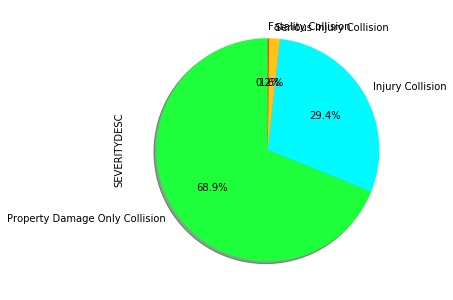

In [23]:
dfSev = df['SEVERITYDESC'].value_counts()
dfSevP = dfSev.plot(kind = 'pie',
                    figsize = (5,6),
                    autopct='%1.1f%%',
                    startangle = 90,
                    colors = collcol,
                    shadow = True
                   )

#make the smaller pieces float away

As we can see from this simple pie chart, in most collisions there is only propertjy damage compared to injuries by a fairly significant margin, with Serious Injury Collisions as well as Fatal Collisions make up even smaller portions of total Collisions.

## Light and Injury

In [24]:
df['LIGHTCOND'].value_counts()

Daylight                    119147
Dark - Street Lights On      50048
Unknown                      13520
Dusk                          6074
Dawn                          2599
Dark - No Street Lights       1573
Dark - Street Lights Off      1236
Other                          244
Dark - Unknown Lighting         20
Name: LIGHTCOND, dtype: int64

In [25]:
lc = df.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts()
lc

LIGHTCOND                 SEVERITYDESC                  
Dark - No Street Lights   Property Damage Only Collision     1210
                          Injury Collision                    338
                          Serious Injury Collision             24
                          Fatality Collision                    1
Dark - Street Lights Off  Property Damage Only Collision      888
                          Injury Collision                    316
                          Serious Injury Collision             28
                          Fatality Collision                    4
Dark - Street Lights On   Property Damage Only Collision    34284
                          Injury Collision                  14604
                          Serious Injury Collision           1015
                          Fatality Collision                  145
Dark - Unknown Lighting   Property Damage Only Collision       12
                          Injury Collision                      8
Dawn               

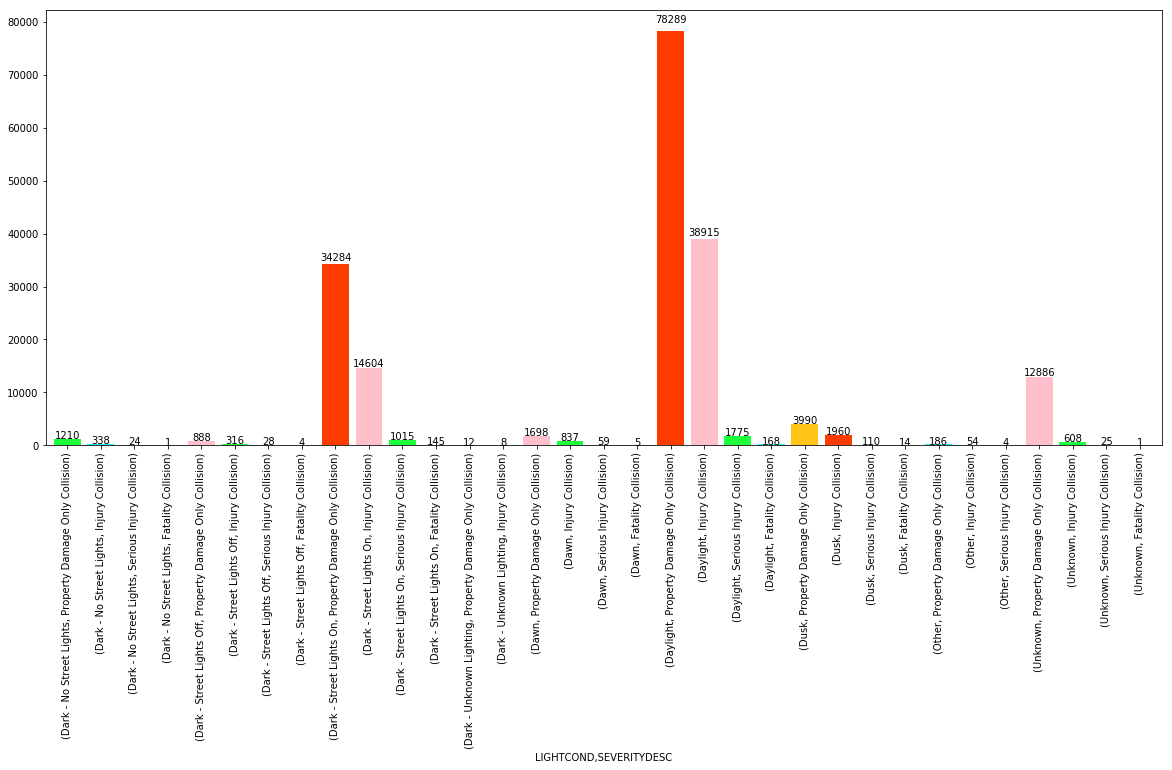

In [26]:
lcp = lc.plot(kind = 'bar', figsize = (20,8), width = 0.8, color = ('#1CFF3A','#00FAFF','#FFC416','#FF3B00', 'pink'))
plt.title = 'Light Condition and Severity of Crashes'
#plt.legend(loc = 2, fontsize = 14)

for p in lcp.patches:
    width = p.get_width()
    height = p.get_height()
    x,y = p.get_xy()
    val = height
    lcp.annotate(val, (x+width/2, y+height*1.02), ha= 'center')

From the bar chart we can see that for all types of light conditions property damage only collisions happen much more frequently than thier injury collisions

In [27]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

### Cleaning the Data

This is the final round of data clean up for the use in a Decision Tree.

In [28]:
stuff = df[['SEVERITYCODE', 'ROADCOND', 'LIGHTCOND' , 'WEATHER']]
stuff = stuff.dropna()
stuff.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
2,1,Dry,Daylight,Overcast
3,1,Dry,Other,Clear
4,1,Dry,Daylight,Clear
5,2,Dry,Daylight,Clear
6,1,Dry,Dark - Street Lights On,Clear


In [29]:
stuff['WEATHER'].value_counts()

Clear                       114206
Raining                      33989
Overcast                     28469
Unknown                      15079
Snowing                        913
Other                          843
Fog/Smog/Smoke                 577
Sleet/Hail/Freezing Rain       116
Blowing Sand/Dirt               55
Severe Crosswind                26
Partly Cloudy                    9
Name: WEATHER, dtype: int64

In [30]:
#remove other and unknown entries, they are worthless
stuff = stuff[~stuff['ROADCOND'].isin(['Unknown'])]
stuff = stuff[~stuff['ROADCOND'].isin(['Other'])]

stuff = stuff[~stuff['LIGHTCOND'].isin(['Unknown'])]
stuff = stuff[~stuff['LIGHTCOND'].isin(['Other'])]
stuff = stuff[~stuff['LIGHTCOND'].isin(['Dark - Unknown Lighting'])]

stuff = stuff[~stuff['WEATHER'].isin(['Unknown'])]
stuff = stuff[~stuff['WEATHER'].isin(['Other'])]

print('Done!')

Done!


In [31]:
stuff['ROADCOND'].value_counts()

Dry               125069
Wet                47527
Ice                 1102
Snow/Slush           842
Standing Water       109
Sand/Mud/Dirt         67
Oil                   60
Name: ROADCOND, dtype: int64

In [32]:
stuff.isnull().sum()

SEVERITYCODE    0
ROADCOND        0
LIGHTCOND       0
WEATHER         0
dtype: int64

# Make a Decision Tree

Note to self: the following code breaks everything so I don't waste time making dts over and over

In [33]:
thing = 5
print(thing +' break')

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [34]:
y = stuff[['SEVERITYCODE']]
x = stuff[['LIGHTCOND', 'ROADCOND' , 'WEATHER']].values

In [35]:
x[0:5]

array([['Daylight', 'Dry', 'Overcast'],
       ['Daylight', 'Dry', 'Clear'],
       ['Daylight', 'Dry', 'Clear'],
       ['Dark - Street Lights On', 'Dry', 'Clear'],
       ['Daylight', 'Dry', 'Clear']], dtype=object)

In [36]:
leLight = preprocessing.LabelEncoder()
leLight.fit(['Daylight', 'Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off'])
x[:,0] = leLight.transform(x[:,0])

leRoad = preprocessing.LabelEncoder()
leRoad.fit(['Dry','Wet','Ice','Snow/Slush','Standing Water', 'Sand/Mud/Dirt', 'Oil'])
x[:,1] = leRoad.transform(x[:,1])

leWeather = preprocessing.LabelEncoder()
leWeather.fit(['Clear', 'Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'])
x[:,2] = leWeather.transform(x[:,2])

x[0:5]

array([[4, 0, 3],
       [4, 0, 1],
       [4, 0, 1],
       [2, 0, 1],
       [4, 0, 1]], dtype=object)

In [37]:
from sklearn.model_selection import train_test_split
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)

In [38]:
print((x_trainset).shape)
print((y_trainset).shape)

(122343, 3)
(122343, 1)


In [39]:
print((x_testset).shape)
print((y_testset).shape)

(52433, 3)
(52433, 1)


In [40]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
decTree.fit(x_trainset, y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
testTree = decTree.predict(x_testset)

In [43]:
print(testTree[0:5])
print(y_testset[0:5])

['1' '1' '1' '1' '1']
       SEVERITYCODE
205358            1
149391            2
135182            1
20322             2
145239            1


In [44]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, testTree))

DecisionTrees's Accuracy:  0.6584784391509164


# Conclusion

From this information we can conclude that the combination of condition of the light, road, as well as the weather are decent predictors giving an accuracy score just under 66%. However, the top collision condition was Daylight, Dry, and Clear respectively. These conditions each are what I would considere to be the "safest" condition to drive in, plenty of visibility from the Daylight and Clear weather with minimal risk of slipping on a dry road. 

In regards to the light condition, most people are asleep at night meaning that the available hours for them to be up in order to be driving at night is easily much lower than the avaialbe hours during the day. Similarly for the weather it is likely that comparatively less people drive during worse weather conditions than they do during good ones, and most likely the same for road conditions.

In conclusion, these variables do have some ability to predict the severity of an accident, but there is still plenty of room for other factors, for example human behavoir.